In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sp_linalg

# load the co-occurrence matrix and dictionary

In [ ]:
file_name = "co_occur.csv"

df = pd.read_csv(file_name, header=None)
M = df.to_numpy()

M_w = np.log10(M + 1) # normalize the matrix

with open('dictionary.txt', 'r') as f:
    words = f.read().splitlines()


# Plot of first 100 singular values

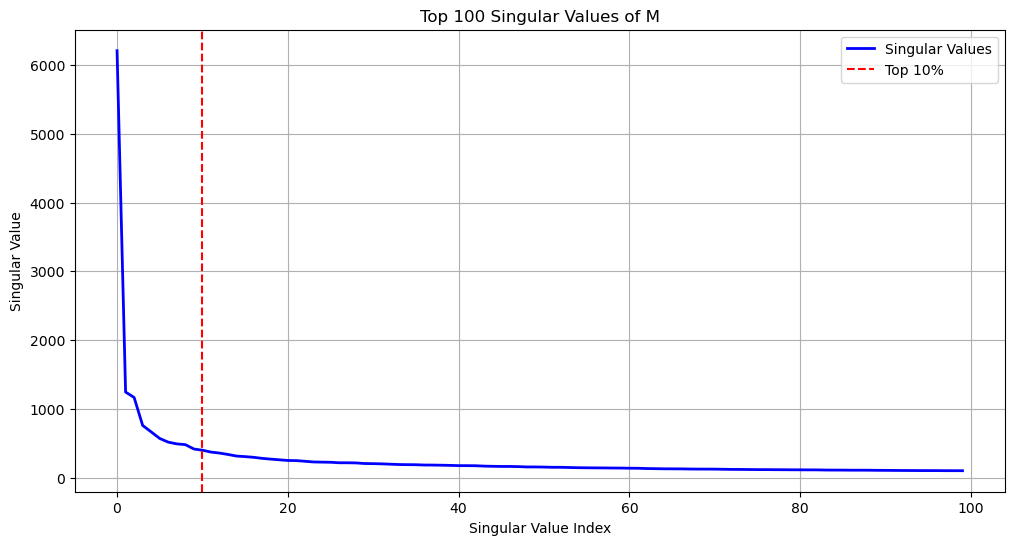

In [4]:
# perform SVD for the first 100 singular values
U, s, Vt = sp_linalg.svds(M_w, k=100)
s = s[::-1]

plt.figure(figsize=(12,6))

plt.plot(s, 'b-', linewidth=2, label='Singular Values')
cirtical_index = int(0.1 * len(s))
plt.axvline(cirtical_index, color='r', linestyle='--', label='Top 10%')

plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Top 100 Singular Values of M')
plt.legend()
plt.grid()
plt.show()


# Try to find out the interpretable dimensions

In [5]:
vec = [3,4,15,24,36]
for i in vec:
    ui = U[:,i]
    index = np.argsort(ui)
    print(i)
    print("largest: ", words[index[-1]])
    print("second largest: ", words[index[-2]])
    print("third largest: ", words[index[-3]])
    print("forth largest: ", words[index[-4]])
    print("fifth largest: ", words[index[-5]])
    print("sixth largest: ", words[index[-6]])
    print("seventh largest: ", words[index[-7]])
    print("eighth largest: ", words[index[-8]])
    print("ninth largest: ", words[index[-9]])
    print("tenth largest: ", words[index[-10]])
    print("-----------------------------------")
    print("smallest: ", words[index[0]])
    print("second smallest: ", words[index[1]])
    print("third smallest: ", words[index[2]])
    print("forth smallest: ", words[index[3]])
    print("fifth smallest: ", words[index[4]])
    print("sixth smallest: ", words[index[5]])
    print("seventh smallest: ", words[index[6]])
    print("eighth smallest: ", words[index[7]])
    print("ninth smallest: ", words[index[8]])
    print("tenth smallest: ", words[index[9]])
    print()

3
largest:  which
second largest:  where
third largest:  who
forth largest:  whom
fifth largest:  that
sixth largest:  gain
seventh largest:  under
eighth largest:  taking
ninth largest:  here
tenth largest:  receiving
-----------------------------------
smallest:  five
second smallest:  several
third smallest:  six
forth smallest:  four
fifth smallest:  were
sixth smallest:  seven
seventh smallest:  eight
eighth smallest:  three
ninth smallest:  been
tenth smallest:  numerous

4
largest:  french
second largest:  quebec
third largest:  du
forth largest:  montreal
fifth largest:  le
sixth largest:  battalion
seventh largest:  fort
eighth largest:  la
ninth largest:  regiment
tenth largest:  pierre
-----------------------------------
smallest:  pp
second smallest:  hit
third smallest:  vol
forth smallest:  orthodox
fifth smallest:  ed
sixth smallest:  pitcher
seventh smallest:  hits
eighth smallest:  eds
ninth smallest:  isbn
tenth smallest:  christian

15
largest:  been
second largest: 

## Interpretation
- Dimension 3 separates quantity-related words (e.g., five, six, several) from syntactic function words (e.g., which, where, under, here).

- Dimension 4 separates publishing/abbreviation-related terms (e.g., pp, vol, isbn) from French-associated words (e.g., french, du, le, la, montreal).

- Dimension 15 separates spatial prepositions (e.g., near, within, in) from verbs in different tenses (e.g., been, are, got, get).

- Dimension 24 separates political/government-related terms (e.g., government, political, law) from geographical terms (e.g., river, north, island).

- Dimension 36 separates entertainment-related vocabulary (e.g., album, film, tv, song) from social role-related words (e.g., people, president, student).

\newpage

# Map some words into the dimension V = $V_{women} - V_{man}$

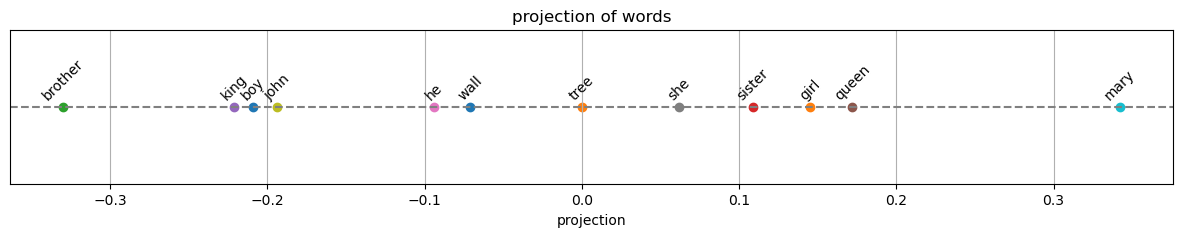

In [6]:
rows_norm = np.linalg.norm(U,axis=1,keepdims=True)
U_normalized = U / rows_norm

# man: 236 women: 783

V1 = U_normalized[783]
V2 = U_normalized[236]
V = V1 - V2
V = V / np.linalg.norm(V)

w = {
    'boy':1121,
    'girl':996,
    'brother':614,
    'sister':1088,
    'king':240,
    'queen':814,
    'he':12,
    'she':42,
    'john':128,
    'mary':788,
    'wall':1273,
    'tree':1403
}

projection = {}
for word,index in w.items():
    projection[word] = np.dot(V,U_normalized[index])
    projection[word] = round(projection[word],3)

plt.figure(figsize=(15, 2))
plt.axhline(0, color='gray', linestyle='--') 
for word, proj in projection.items():
    plt.scatter(proj, 0)
    plt.text(proj, 0.005, word, ha='center', rotation=45)  

plt.title("projection of words")
plt.xlabel("projection")
plt.yticks([]) 
plt.grid(True, axis='x')
plt.show()
 


## Interpretation
- Words related to the male gender (such as boy, brother, king) are distributed on the left side of the zero value
- while words related to the female gender (such as queen, sister) are distributed on the right side of the zero value. 
- Neutral words like "tree" are exactly at the zero value.



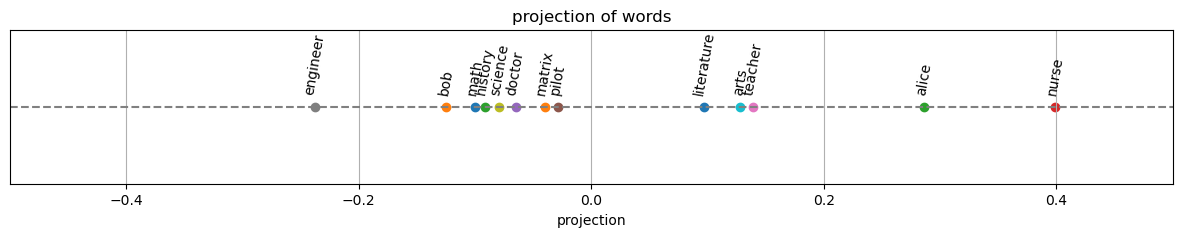

In [7]:
#  math, matrix, history, nurse, doctor, pilot, teacher, engineer, science, arts, literature, bob, alice
w_2 = {
    'math': 5304,
    'matrix': 4361,
    'history': 98,
    'nurse': 5777,
    'doctor': 1361,
    'pilot': 1713,
    'teacher': 1569,
    'engineer': 1668,
    'science': 406,
    'arts': 533,
    'literature': 1120,
    'bob': 1401,
    'alice': 3397
}

projection_2 = {}
for word, index in w_2.items():
    projection_2[word] = np.dot(V, U_normalized[index])
    projection_2[word] = round(projection_2[word], 3)

plt.figure(figsize=(15, 2))
plt.axhline(0, color='gray', linestyle='--')  
for word, proj in projection_2.items():
    plt.scatter(proj, 0)
    plt.text(proj, 0.01, word, ha='center', rotation=80) 

plt.xlim(-0.5, 0.5)
plt.title("projection of words")
plt.xlabel("projection")
plt.yticks([])
plt.grid(True, axis='x')
plt.show()


## Interpretation
- It can be seen that certain professions exhibit significant differences in terms of gender representation
- For example, professions such as engineers and pilots tend to skew male, while teachers and nurses tend to skew female, which may also lead to some bias issues

\newpage

# Find out "the most similar word"
- The similarity is measured by cosine-similarity 
- use "montreal" and "apple" as examples

In [8]:

def find_closest_by_vec(vec,omit):
    sim=[]
    for i in range(10000):
        if i in omit:
            sim.append(0)
            continue
        sim.append(np.dot(vec,U_normalized[i]))

    sim = np.array(sim)
    index = np.argsort(sim)
    return index

index_montreal = 2207
montreal_vec = U_normalized[index_montreal]
omit = [index_montreal]

print(f"most similar words to {words[index_montreal]}:")
index = find_closest_by_vec(montreal_vec,omit)
for i in range(5):
    print(words[index[-(i+1)]],end=" ")

index_apple = 3370
apple_vec = U_normalized[index_apple]
omit_apple = [index_apple]
print(f"\nmost similar words to {words[index_apple]}:")
index = find_closest_by_vec(apple_vec,omit_apple)
for i in range(5):
    print(words[index[-(i+1)]],end=" ")




most similar words to montreal:
vancouver toronto ottawa winnipeg calgary 
most similar words to apple:
microsoft ibm linux palm os 

## Interpretation
- It can also be observed here that similar technology companies or tech-related terms are associated with Apple
- indicating that in the training data, Apple is more likely to refer to Apple Inc, rather than the fruit

\newpage

# Import test data
- This part will solve word analogy tasks
- For example:
  - "man is to women as king is to ?"
  - the goal is to fill in the ? by a proper word
  - in this case, is "queen"

In [10]:
test=[]
with open("analogy_task.txt",'r') as f:
    for line in f:
        test.append(line.strip().split(" "))

dict_words={}
for i in range(len(words)):
    current_word = words[i]
    dict_words[current_word] = i 





# Perform analogy test and calculate the correct rate

In [11]:
correct = 0
over_5=[]
count = 0
mylist=[]
for i in test:
    count+=1
    omit = []
    for j in range(3):
        omit.append(dict_words[i[j]])
    ans = i[3]
    v_diff = U_normalized[dict_words[i[1]]] - U_normalized[dict_words[i[0]]] + U_normalized[dict_words[i[2]]]
    v_diff = v_diff/np.linalg.norm(v_diff)
    index = find_closest_by_vec(v_diff,omit)
    if words[index[-1]] == ans:
        correct+=1
print(f"correct: {correct}")
print(f"total: {len(test)}")
print(f"accuracy: {correct/len(test)}")


correct: 3071
total: 5585
accuracy: 0.5498657117278425
